In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
import numpy as np
import pandas as pd
import torch

In [2]:
data = pd.read_csv(
    "data/gender_age_height_weight.csv"
)

In [3]:
data.drop(data[data["Weight (lbs)"] <= 0].index, inplace=True)

In [4]:
female = data[data["Gender"] == "Female"]
male = data[data["Gender"] == "Male"]

In [5]:
male_tensor = male[["Height (inches)", "Weight (lbs)"]].as_matrix()
female_tensor = female[["Height (inches)", "Weight (lbs)"]].as_matrix()

/home/michael/.local/share/virtualenvs/nearest-centroids--G6q_kiU/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/michael/.local/share/virtualenvs/nearest-centroids--G6q_kiU/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
female_mean = np.mean(female_tensor, axis=0)
male_mean = np.mean(male_tensor, axis=0)

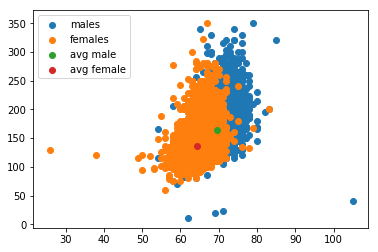

In [7]:
plt.scatter(male_tensor[:, 0], male_tensor[:, 1])
plt.scatter(female_tensor[:, 0], female_tensor[:, 1])
plt.scatter(male_mean[0], male_mean[1])
plt.scatter(female_mean[0], female_mean[1])
plt.legend(["males", "females", "avg male", "avg female"])

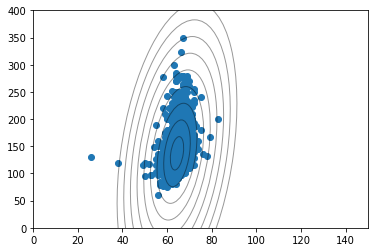

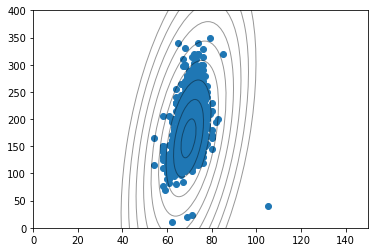

In [8]:
def make_ellipse(tensor, ellipse_multiple=[1]):
    tensor_mean = np.mean(tensor, axis=0)
    cov = np.cov(tensor.T)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in ellipse_multiple:
        ellipse = Ellipse(
            xy=(tensor_mean[0], tensor_mean[1]),
            width=lambda_[0] * 1 * i,
            height=lambda_[1] * 1 * i,
            angle=np.rad2deg(np.arccos(v[0, 0])),
            ec="black",
            fc="none",
            alpha=0.4
        )
        ax.add_artist(ellipse)
    ax.set_xlim(left=0, right=150)
    ax.set_ylim(bottom=0, top=400)
    ax.scatter(tensor[:, 0], tensor[:, 1])
    ax.plot(tensor_mean[0])
    plt.show()
make_ellipse(female_tensor, ellipse_multiple=range(0, 20, 2))
make_ellipse(male_tensor, ellipse_multiple=range(0, 20, 2))

In [9]:
train = data.sample(frac=0.7, random_state=np.random.RandomState(seed=42))
test = data.drop(index=train.index, axis=1)

In [10]:
male_train = train[train["Gender"] == "Male"].loc[:, ["Height (inches)", "Weight (lbs)"]]
female_train = train[train["Gender"] == "Female"].loc[:, ["Height (inches)", "Weight (lbs)"]]

In [11]:
male_centroid = np.mean(male_train)
fem_centroid = np.mean(female_train)

In [12]:
male_cov = np.cov(male_train.as_matrix().T)
fem_cov = np.cov(female_train.as_matrix().T)

/home/michael/.local/share/virtualenvs/nearest-centroids--G6q_kiU/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/michael/.local/share/virtualenvs/nearest-centroids--G6q_kiU/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [13]:
correct = 0
count = 0
for idx, point in test.iterrows():
    count += 1
    x, y = point["Height (inches)"], point["Weight (lbs)"]
    gender = point["Gender"]
    male_dist = male_centroid - [x, y]
    female_dist = fem_centroid - [x, y]
    y_hat_male = np.dot(np.dot(male_dist, male_cov), male_dist)
    y_hat_fem = np.dot(np.dot(female_dist, fem_cov), female_dist)
    if y_hat_male < y_hat_fem:
        prediction = "Male"
    else:
        prediction = "Female"
    if prediction == gender:
        correct += 1
print(f"{correct / count * 100:.2f}% correct")

66.24% correct
